# Implementação dos grafos

In [257]:
import heapq
from math import ceil,floor
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [258]:
def fill_line(matriz: np.array,
              line: list,
              color: int = 150
              ):

    for x, y in line:
        matriz[x][y] = color

    return matriz

In [259]:
def calculate_line(Point_p1: tuple,
                   Point_p2: tuple,
                   matriz: np.array = None,
                   list_segment: list = None,
                   draw: bool = True
                   ):

    """
        Calculela line is valid

    args:
        point_p1 : coordinates of the point 1
        point_p2 : coordinates of the point 2

    Returns:
        _type_: list
    """


    line = []
    x1 , y1 = Point_p1
    x2, y2 = Point_p2


    step = max(abs(y2-y1), abs(x2-x1) )
    line = []

    xinc = (x2 - x1)/step
    yinc = (y2 - y1)/step
    aux_x = x = x1
    aux_y = y = y1
    while(x <= x2 -1   or y <= y2 - 1 ):
        if not draw and line != []:
            if (aux_x, aux_y) in list_segment:
                #aux_x, aux_y, x1,y1,x2,y2)
                line = []
                break
        line.append((aux_x, aux_y))
        x = x + xinc
        y = y + yinc
        aux_x = floor(x)
        aux_y = floor(y)


    if line != []:
        line.append((x2,y2))

    if draw:
        fill_line(matriz,line)

    return  line

In [260]:
def star_schema(point_target, matriz, obs, list_segments):

    points_possibles = {}

    for edges in obs:
        index_p = -1
        if (point_target in edges):
            index_p = edges.index(point_target)

        for ind  in range(len(edges)):

            if index_p > -1:
                if (index_p == ind or ind == index_p -2 or ind == index_p + 2):
                    continue


            if (line_point :=  calculate_line(point_target, edges[ind], matriz,list_segments, False)):
                fill_line(matriz, line_point, 255)
                points_possibles[edges[ind]] = line_point



    return points_possibles


In [261]:
def get_edge_segments(matriz, edge:list[list], list_segment: list, dict_segments: dict):

    p1 = ( calculate_line(edge[0], edge[1], matriz))
    p2 = (calculate_line(edge[1], edge[2], matriz))
    p3 = (calculate_line(edge[3], edge[2], matriz))
    p4 = (calculate_line(edge[0], edge[3], matriz))
    dict_segments[edge[0]] = {edge[1]: p1, edge[3]: p4}
    dict_segments[edge[1]] = {edge[2]: p2}
    dict_segments[edge[3]] = {edge[2]: p3}
    
    list_segment.extend(p1 + p2 + p3 + p4)

    return list_segment

In [262]:
def calculate__route(matriz: np.array,
                     point_initial: tuple,
                     point_final: tuple,
                     obs: list[list],
                     list_segments: list,
                     dict_segments: list
                     ):

    points_possibles = {}
    line = []

    if line := calculate_line(point_initial, point_final , matriz, list_segments, False):
        fill_line(matriz,line,255)
    else:
        obs.append([point_final])
        points_possibles = {point_initial : star_schema(point_initial, matriz, obs, list_segments)}
        keys_possibels = set(points_possibles[point_initial].keys())
        aux_keys = []
        while( keys_possibels != set() ):

            for point in keys_possibels:

                points_possibles[point] = star_schema(point, matriz, obs, list_segments)
                
                if(point in dict_segments.keys()):
                    points_possibles[point].update(dict_segments[point])
                aux_keys.extend( list(points_possibles[point].keys())) 

            print("Mateus te mamo!!") 
            aux_keys = set(aux_keys)
            keys_possibels = aux_keys.difference(set(points_possibles.keys()))
            aux_keys = []


    return points_possibles

In [263]:
def create_matriz(
        tamanho: int = 100,
        tam_obs: int = 20,
        qtd_obs: int = 50,
        point_init: tuple= None,
        point_final: tuple= None
):

    # Cria a matriz usando numpy_min
    matriz = np.zeros((tamanho, tamanho), dtype=int)

    fill_line(matriz,[point_init, point_final],100)

    # lista de obstaculos
    obstaculos = []

    x_valid = tamanho - tam_obs - 1
    y_valid = tamanho - tam_obs - 1
    # loop de gerar obstaculos
    num_obstaculos = 0
    list_segments = []
    dict_segments = {}
    while num_obstaculos < qtd_obs:

        # Gere coordenadas aleatórias do canto superior esquerdo dentro do intervalo válido

        x_min = random.randint(0, x_valid)
        y_min = random.randint(0, y_valid)
        x_max = x_min + tam_obs
        y_max = y_min + tam_obs

        # Varifica se a sobreposção

        if matriz[x_min:x_max +1 , y_min:y_max + 1  ].sum() > 0:
            continue

        # Desenhe obstáculo na matriz usando fatiamento
        matriz[x_min:x_max , y_min:y_max ] = 1

        num_obstaculos += 1

        # Crie um obstáculo como uma tupla de cantos superiores esquerdo e inferior direito
        obstaculo = [(x_min,y_min),(x_min,y_max), (x_max, y_max), (x_max, y_min)]

        # Adicione coordenadas de obstáculos à lista

        obstaculos.append(obstaculo)

        get_edge_segments(matriz,obstaculo, list_segments, dict_segments)

    return matriz, list_segments, obstaculos, dict_segments

83 93 41 51 soma =  0
48 58 36 46 soma =  0
82 92 9 19 soma =  0
82 92 52 62 soma =  0
54 64 43 53 soma =  1212
31 41 65 75 soma =  0


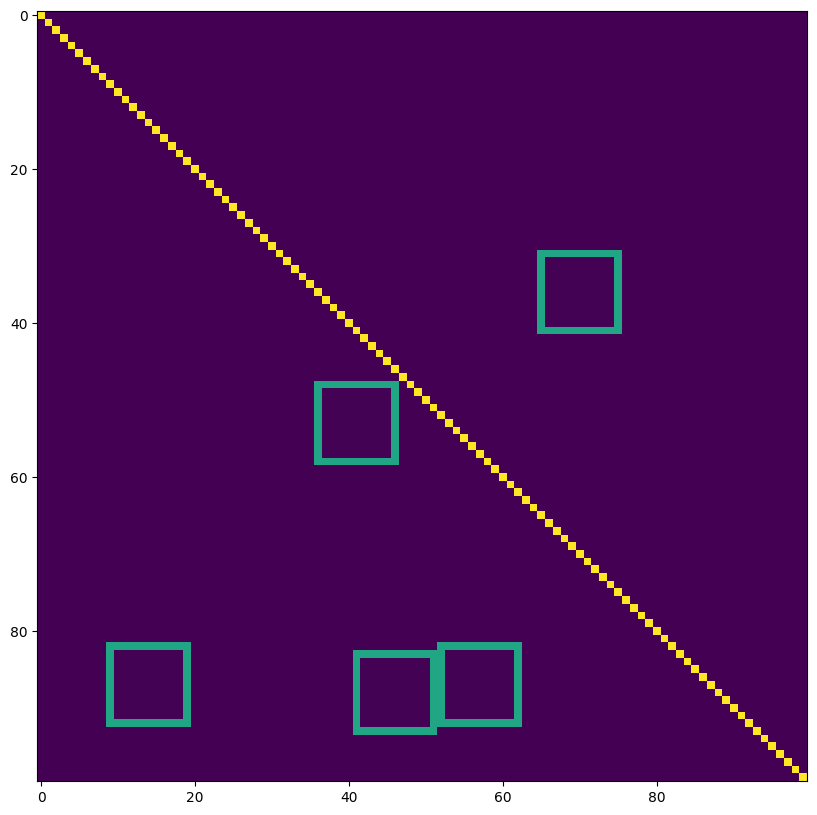

In [264]:
def main():

  # Define o tamanho da matriz
  tamanho = 100

  # Define o tamanho dos obstaculos
  tamanho_obstaculo =10

  point_1 = (0,0)
  point_2 = (99,99)

  matriz, list_segments , obs, dict_segments= create_matriz(tamanho, tamanho_obstaculo, 5, point_1, point_2)



  points = calculate__route(matriz, point_1, point_2, obs, list_segments, dict_segments)

  # plota a matiz
  plt.figure(figsize=(10,10))
  plt.imshow(matriz)
  plt.show()

main()

In [265]:
# Define o tamanho da matriz
tamanho = 20

# Define o tamanho dos obstaculos
tamanho_obstaculo = 8

point_1 = (0,0)
point_2 = (19,19)

matriz, list_segments , obs, dict_segments = create_matriz(tamanho, tamanho_obstaculo, 2, point_1, point_2)



#points = calculate__route(matriz, point_1, point_2, obs, list_segments, dict_segments)


# plota a matiz
plt.figure(figsize=(10,10))
plt.imshow(matriz)
plt.show()

5 13 4 12 soma =  0
10 18 6 14 soma =  1518
1 9 7 15 soma =  1365
1 9 1 9 soma =  1212
9 17 11 19 soma =  904
9 17 10 18 soma =  1058
4 12 6 14 soma =  1986
0 8 5 13 soma =  1514
1 9 7 15 soma =  1365
9 17 2 10 soma =  1520
7 15 4 12 soma =  2142
6 14 6 14 soma =  2142
11 19 7 15 soma =  1210
8 16 7 15 soma =  1675
11 19 10 18 soma =  754
11 19 2 10 soma =  1210
7 15 11 19 soma =  1206
5 13 4 12 soma =  2299
2 10 7 15 soma =  1520
4 12 0 8 soma =  1518
3 11 4 12 soma =  1985
0 8 7 15 soma =  1210
0 8 10 18 soma =  754
7 15 7 15 soma =  1830
9 17 6 14 soma =  1674
11 19 5 13 soma =  1514
2 10 6 14 soma =  1674
7 15 10 18 soma =  1362
2 10 7 15 soma =  1520
9 17 8 16 soma =  1366
9 17 8 16 soma =  1366
4 12 10 18 soma =  1362
10 18 10 18 soma =  906
11 19 3 11 soma =  1362
2 10 1 9 soma =  1366
2 10 1 9 soma =  1366
9 17 11 19 soma =  904
3 11 3 11 soma =  1830
4 12 0 8 soma =  1518
4 12 5 13 soma =  2142
1 9 6 14 soma =  1518
9 17 11 19 soma =  904
5 13 0 8 soma =  1671
7 15 1 9 soma = 

 1365
5 13 3 11 soma =  2142
7 15 1 9 soma =  1674
11 19 4 12 soma =  1514
5 13 0 8 soma =  1671
7 15 6 14 soma =  1986
6 14 6 14 soma =  2142
11 19 2 10 soma =  1210
5 13 7 15 soma =  1985
2 10 3 11 soma =  1674
1 9 0 8 soma =  1059
2 10 0 8 soma =  1212
5 13 1 9 soma =  1828
7 15 6 14 soma =  1986
7 15 7 15 soma =  1830
4 12 6 14 soma =  1986
3 11 9 17 soma =  1365
9 17 2 10 soma =  1520
5 13 1 9 soma =  1828
11 19 8 16 soma =  1058
10 18 8 16 soma =  1212
10 18 8 16 soma =  1212
6 14 10 18 soma =  1514
4 12 6 14 soma =  1986
5 13 0 8 soma =  1671
6 14 3 11 soma =  2142
5 13 1 9 soma =  1828
10 18 6 14 soma =  1518
11 19 9 17 soma =  906
4 12 11 19 soma =  1206
11 19 3 11 soma =  1362
7 15 1 9 soma =  1674
10 18 4 12 soma =  1671
4 12 1 9 soma =  1674
8 16 5 13 soma =  1985
9 17 6 14 soma =  1674
9 17 3 11 soma =  1674
5 13 5 13 soma =  2299
10 18 6 14 soma =  1518
10 18 6 14 soma =  1518
7 15 2 10 soma =  1830
5 13 7 15 soma =  1985
1 9 10 18 soma =  906
4 12 8 16 soma =  1674
2 10 

KeyboardInterrupt: 

In [ ]:
points.keys()

NameError: name 'points' is not defined

In [ ]:
list_values = points.values()
edgs = [x.keys() for x in list_values]

In [ ]:
dict_segments

{(10,
  10): {(10, 18): [(10, 10),
   (10, 11),
   (10, 12),
   (10, 13),
   (10, 14),
   (10, 15),
   (10, 16),
   (10, 17),
   (10, 18)], (18, 10): [(10, 10),
   (11, 10),
   (12, 10),
   (13, 10),
   (14, 10),
   (15, 10),
   (16, 10),
   (17, 10),
   (18, 10)]},
 (10,
  18): {(18, 18): [(10, 18),
   (11, 18),
   (12, 18),
   (13, 18),
   (14, 18),
   (15, 18),
   (16, 18),
   (17, 18),
   (18, 18)]},
 (18,
  10): {(18, 18): [(18, 10),
   (18, 11),
   (18, 12),
   (18, 13),
   (18, 14),
   (18, 15),
   (18, 16),
   (18, 17),
   (18, 18)]},
 (0,
  11): {(0, 19): [(0, 11),
   (0, 12),
   (0, 13),
   (0, 14),
   (0, 15),
   (0, 16),
   (0, 17),
   (0, 18),
   (0, 19)], (8, 11): [(0, 11),
   (1, 11),
   (2, 11),
   (3, 11),
   (4, 11),
   (5, 11),
   (6, 11),
   (7, 11),
   (8, 11)]},
 (0,
  19): {(8, 19): [(0, 19),
   (1, 19),
   (2, 19),
   (3, 19),
   (4, 19),
   (5, 19),
   (6, 19),
   (7, 19),
   (8, 19)]},
 (8,
  11): {(8, 19): [(8, 11),
   (8, 12),
   (8, 13),
   (8, 14),
   (8, 

In [ ]:
points

{(0,
  0): {(8, 3): [(0, 0),
   (1, 0),
   (2, 0),
   (3, 1),
   (4, 1),
   (5, 1),
   (6, 2),
   (7, 2),
   (8, 3)], (8, 11): [(0, 0),
   (0, 1),
   (1, 2),
   (2, 3),
   (2, 4),
   (3, 5),
   (4, 6),
   (5, 7),
   (5, 8),
   (6, 9),
   (7, 10),
   (8, 11)], (16, 3): [(0, 0),
   (1, 0),
   (2, 0),
   (3, 0),
   (4, 0),
   (5, 0),
   (6, 1),
   (7, 1),
   (8, 1),
   (9, 1),
   (10, 1),
   (11, 2),
   (12, 2),
   (13, 2),
   (14, 2),
   (15, 2),
   (16, 3)], (0, 11): [(0, 0),
   (0, 1),
   (0, 2),
   (0, 3),
   (0, 4),
   (0, 5),
   (0, 6),
   (0, 7),
   (0, 8),
   (0, 9),
   (0, 10),
   (0, 11)]},
 (16,
  3): {(8, 11): [(16, 3),
   (15, 4),
   (14, 5),
   (13, 6),
   (12, 7),
   (11, 8),
   (10, 9),
   (9, 10),
   (8, 11)], (16, 11): [(16, 3),
   (16, 4),
   (16, 5),
   (16, 6),
   (16, 7),
   (16, 8),
   (16, 9),
   (16, 10),
   (16, 11)]},
 (8,
  3): {(0, 11): [(8, 3),
   (7, 4),
   (6, 5),
   (5, 6),
   (4, 7),
   (3, 8),
   (2, 9),
   (1, 10),
   (0, 11)], (8, 11): [(8, 3),
   (8, 

In [ ]:
obs

[[(10, 10), (10, 18), (18, 18), (18, 10)],
 [(0, 11), (0, 19), (8, 19), (8, 11)]]

In [ ]:
p1 = 16, 0 = 9,9 = (9, 9): [  (9, 9): [(16, 0),
   (9, 9),
   (15, 1),
   (14, 2),
   (13, 3),
   (12, 4),
   (12, 5),
   (11, 6),
   (10, 7),
   (9, 8)],
  (17, 9): [(16, 8), (17, 9)]}
cruzaram -> (8, 8), (16, 8) =  (8,8): {(16, 8): [(8, 8),
                                                (16, 8),
                                                (9, 8),
                                                (10, 8),
                                                (11, 8),
                                                (12, 8),
                                                (13, 8),
                                                (14, 8),
                                                (15, 8)]},

In [ ]:
def criar_novo_dicionario(dicionario_original):
    novo_dicionario = {}

    for chave_externa in dicionario_original:
        chaves_internas = []

        for chave_interna in dicionario_original[chave_externa]:
            chaves_internas.append(chave_interna)

        novo_dicionario[chave_externa] = chaves_internas

    return novo_dicionario


## Dicionarios de vertices e arestas

In [ ]:
novo_dicionario = criar_novo_dicionario(points)

In [ ]:
#novo_dicionario.pop((99,99))

In [ ]:
novo_dicionario

{(0, 0): [(7, 1), (7, 9), (15, 1), (3, 10), (3, 18)],
 (7, 1): [(3, 10), (7, 9), (15, 9)],
 (15, 1): [(7, 1), (11, 10)],
 (3, 10): [(7, 1), (7, 9), (3, 18), (11, 18)],
 (7, 9): [(7, 1), (3, 10), (15, 9)],
 (3, 18): [(3, 10), (11, 18)],
 (11, 18): [(7, 1), (7, 9), (3, 18), (11, 10), (19, 19), (11, 18)],
 (11, 10): [(7, 1), (7, 9), (3, 10)],
 (15, 9): [(7, 9), (15, 1), (3, 10), (11, 10), (19, 19), (15, 9)],
 (19, 19): [(7, 1),
  (7, 9),
  (15, 9),
  (15, 1),
  (3, 10),
  (3, 18),
  (11, 18),
  (11, 10)]}

In [ ]:
for chave_externa in novo_dicionario:
  print(chave_externa)

(0, 0)
(7, 1)
(15, 1)
(3, 10)
(7, 9)
(3, 18)
(11, 18)
(11, 10)
(15, 9)
(19, 19)


In [ ]:
nodes = []
for node in novo_dicionario:
  nodes.append(node)
print(nodes)

[(0, 0), (7, 1), (15, 1), (3, 10), (7, 9), (3, 18), (11, 18), (11, 10), (15, 9), (19, 19)]


In [ ]:
for node in nodes:
  print("\n")
  for list_p in novo_dicionario[node]:
    print(node, "->", list_p)



(0, 0) -> (7, 1)
(0, 0) -> (7, 9)
(0, 0) -> (15, 1)
(0, 0) -> (3, 10)
(0, 0) -> (3, 18)


(7, 1) -> (3, 10)
(7, 1) -> (7, 9)
(7, 1) -> (15, 9)


(15, 1) -> (7, 1)
(15, 1) -> (11, 10)


(3, 10) -> (7, 1)
(3, 10) -> (7, 9)
(3, 10) -> (3, 18)
(3, 10) -> (11, 18)


(7, 9) -> (7, 1)
(7, 9) -> (3, 10)
(7, 9) -> (15, 9)


(3, 18) -> (3, 10)
(3, 18) -> (11, 18)


(11, 18) -> (7, 1)
(11, 18) -> (7, 9)
(11, 18) -> (3, 18)
(11, 18) -> (11, 10)
(11, 18) -> (19, 19)
(11, 18) -> (11, 18)


(11, 10) -> (7, 1)
(11, 10) -> (7, 9)
(11, 10) -> (3, 10)


(15, 9) -> (7, 9)
(15, 9) -> (15, 1)
(15, 9) -> (3, 10)
(15, 9) -> (11, 10)
(15, 9) -> (19, 19)
(15, 9) -> (15, 9)


(19, 19) -> (7, 1)
(19, 19) -> (7, 9)
(19, 19) -> (15, 9)
(19, 19) -> (15, 1)
(19, 19) -> (3, 10)
(19, 19) -> (3, 18)
(19, 19) -> (11, 18)
(19, 19) -> (11, 10)


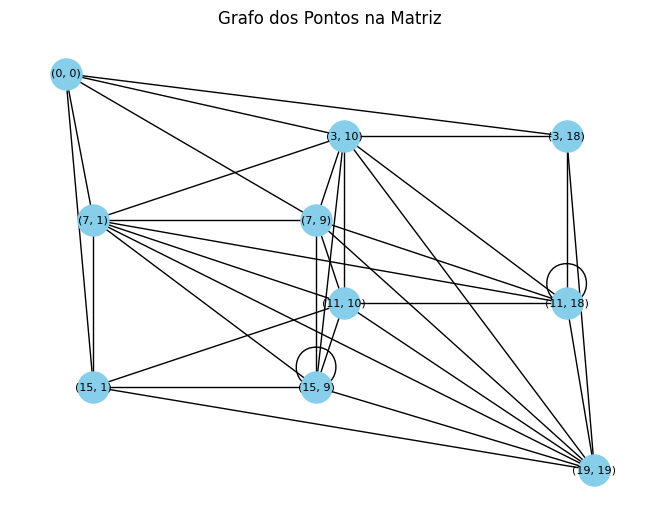

In [ ]:

def criar_grafo(dicionario_original):
    G = nx.Graph()

    # Adicionando nós ao grafo
    for chave_externa in dicionario_original:
        G.add_node(chave_externa)

        for chave_interna in dicionario_original[chave_externa]:
          #print(chave_externa, "->", chave_interna)
          G.add_node(chave_interna)
          G.add_edge(chave_externa, chave_interna)


    return G

def desenhar_grafo_como_matriz(G):
    # Mapeamento de posição dos nós
    pos = {}
    for node in G.nodes():
        pos[node] = (node[1], -node[0])  # Invertendo a coordenada y para coincidir com a orientação da matriz

    # Desenhando o grafo
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8)
    plt.title('Grafo dos Pontos na Matriz')
    plt.show()

# Teste da função
G = criar_grafo(novo_dicionario)

desenhar_grafo_como_matriz(G)
